# Plots for figrue1 for the paper

In [28]:
! pip install ../dist/remseno-0.0.1.tar.gz

Processing /Users/ariane/Documents/code/remseno/dist/remseno-0.0.1.tar.gz
  Preparing metadata (setup.py) ... done


  Created wheel for remseno: filename=remseno-0.0.1-py3-none-any.whl size=46375 sha256=30f13ade4cbdda635de75d5c7acd53f3ae04f346804a31d982995d654e814aa9
  Stored in directory: /Users/ariane/Library/Caches/pip/wheels/d6/dc/60/90822bf7a588c586397c0d67b4da6cb9f75f949c74ed65b439
Successfully built remseno
  Attempting uninstall: remseno
    Found existing installation: remseno 0.0.1
    Uninstalling remseno-0.0.1:
      Successfully uninstalled remseno-0.0.1


## Initial processing of CSV files saved from QGIS

_MergeQGISClasses

In [1]:
import pandas as pd

data_dir = '../data/dryad_trees/location_files/'
df1 = pd.read_csv(f'{data_dir}redcedar.csv')
df1['class'] = 'RedCedar'
df2 = pd.read_csv(f'{data_dir}pine.csv')
df2['class'] = 'Pine'
df = pd.concat([df1, df2])
df.to_csv(f'{data_dir}Annotations.csv', index=False)

## Figure 1A

1. Plot the classes on the image in RGB

In [2]:
df = pd.read_csv(f'{data_dir}ood.csv')
df['class'] = 'OOD'
df = pd.concat([df, df1, df2])
df.to_csv(f'{data_dir}ood.csv', index=False)

In [2]:
drone_pine_coords = '../data/dryad_trees/location_files/Annotations.csv' 

--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	RedCedar	Pine	 in column:	class	Your dataset origionally had:	85	
Now you have:	85	
--------------------------------------------------------------------------------


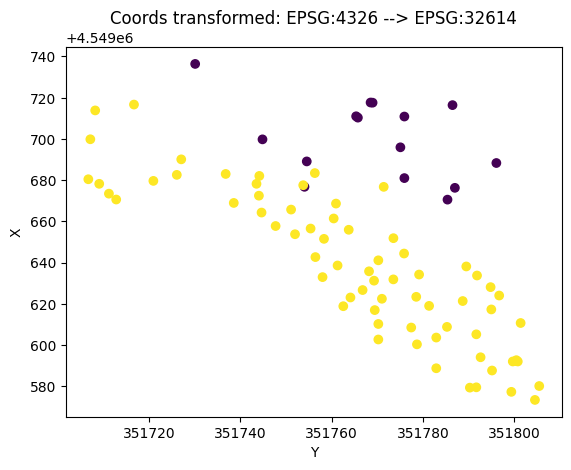

In [3]:
from remseno import *
from remseno.indices import *

c = Coords(drone_pine_coords, x_col='Y', y_col='X', label_col='class',
                   id_col='id', sep=',', class1='RedCedar', class2='Pine', crs="EPSG:4326")
c.transform_coords(tree_coords="EPSG:4326", image_coords="EPSG:32614", plot=True)

In [4]:
drone_ortho = '../data/dryad_trees/Stitch_Image/20190518_pasture_100ft_RGB_GCPs_Forest.tif'
o = Image()
o.load_image(image_path=drone_ortho)

--------------------------------------------------------------------------------
left edge coord:	351687.04777000006	
bottom edge coord:	4549553.40528	
right edge coord:	351825.27869000006	
top edge coord:	4549748.45398	
dataset width:	19918	
dataset height:	28105	
number of bands:	(1, 2, 3)	
geo ref system:	EPSG:32614	
data transform
	| 0.01, 0.00, 351687.05|
| 0.00,-0.01, 4549748.45|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------


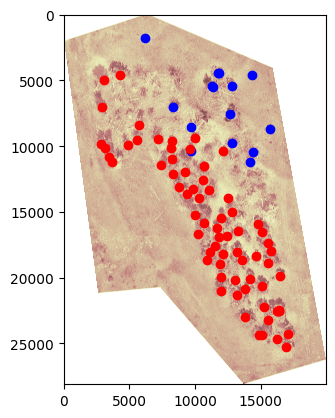

In [5]:
ax = c.plot_on_image(o)

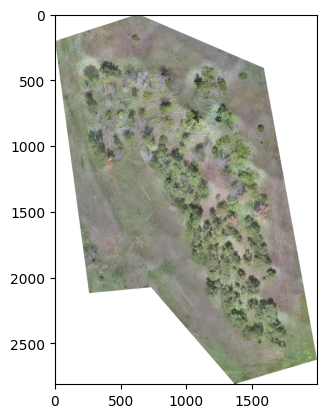

In [6]:
ax = o.plot_multi_bands([1, 2, 3], downsample=10)

In [7]:
c.df

,X,Y,id,vertex_index,vertex_part,vertex_part_index,distance,angle,class,binary_label,Y_EPSG:4326,X_EPSG:4326,colour
0,4.549736e+06,351730.066324,1,0,0,0,0.0,0.0,RedCedar,0,41.085380,-100.765229,blue
1,4.549718e+06,351768.532563,2,0,0,0,0.0,0.0,RedCedar,0,41.085218,-100.764766,blue
2,4.549716e+06,351786.500345,3,0,0,0,0.0,0.0,RedCedar,0,41.085210,-100.764552,blue
3,4.549710e+06,351765.748822,4,0,0,0,0.0,0.0,RedCedar,0,41.085152,-100.764798,blue
4,4.549688e+06,351796.116905,6,0,0,0,0.0,0.0,RedCedar,0,41.084959,-100.764431,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,4.549658e+06,351747.707477,23,0,0,0,0.0,0.0,Pine,1,41.084675,-100.765000,red
81,4.549651e+06,351758.316869,24,0,0,0,0.0,0.0,Pine,1,41.084621,-100.764872,red
82,4.549656e+06,351755.379806,25,0,0,0,0.0,0.0,Pine,1,41.084665,-100.764908,red
83,4.549652e+06,351773.541648,26,0,0,0,0.0,0.0,Pine,1,41.084626,-100.764691,red


In [8]:
#

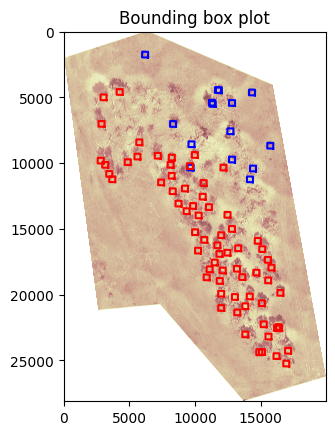

In [9]:
# Plot each tree individually and the class that it belongs to
df = c.df
ax = o.plot(2, show_plot=False)
colour = df['colour'].values
for i in range(0, len(df)):
    x = df[c.x_col].values[i]
    y = df[c.y_col].values[i]
    bb = c.build_polygon_from_centre_point(x, y, 3, 3, "EPSG:32614")
    bb = [o.image.index(b[0], b[1]) for b in bb]
    xs = [b[1] for b in bb]
    ys = [b[0] for b in bb]
    ax.plot(xs, ys, c=colour[i])
plt.title("Bounding box plot")
plt.show()

In [10]:
# Plot each tree individually and the class that it belongs to
df = c.df
colour = df['colour'].values
bands = [o.image.read(b) for b in [1, 2, 3]]

<Figure size 2000x200 with 0 Axes>

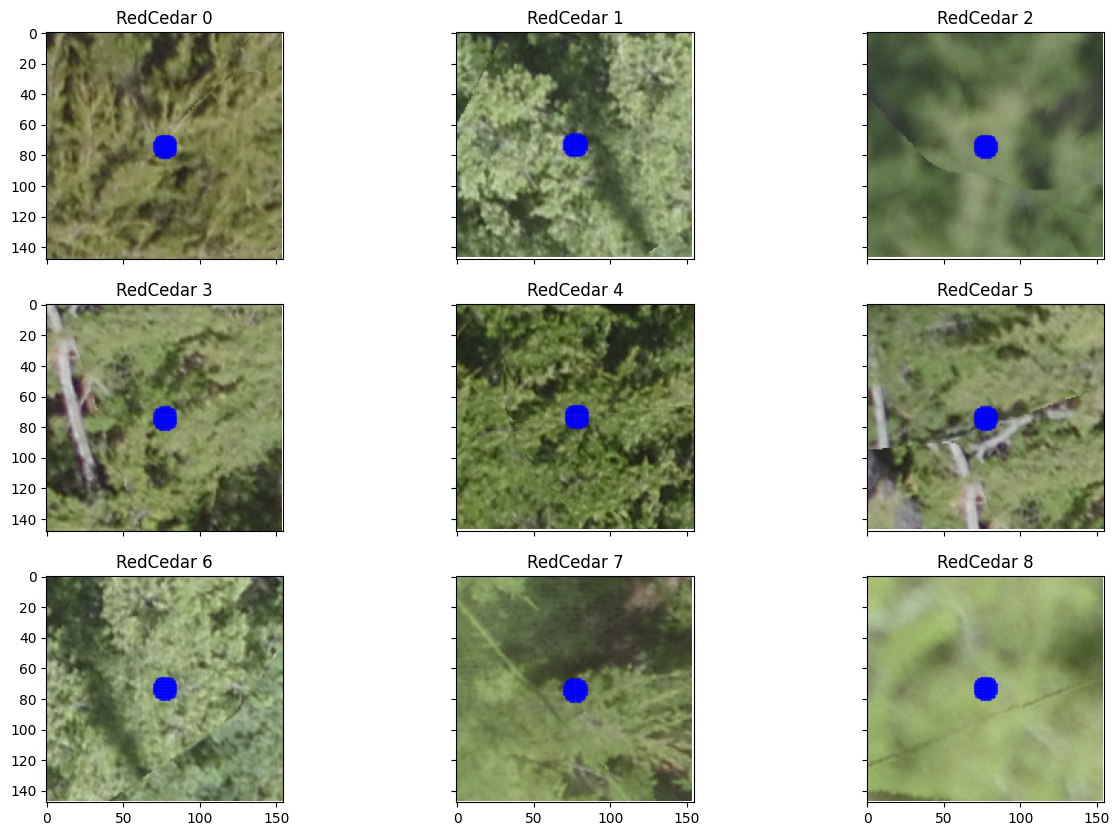

In [ ]:
tree_labels = df['class']
plt.figure(figsize=(20, 2))

n = 3

fig, axs = plt.subplots(n,n, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True, sharex=True)

grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

axs = axs.ravel()
axi = 0
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        ax = axs[axi]
        x = df[c.x_col].values[axi]
        y = df[c.y_col].values[axi]
        bb0 = c.build_polygon_from_centre_point(x, y, 1, 1, "EPSG:32614")
        bb = [o.image.index(x[0], x[1]) for x in bb0]
        permute = 0
        downsample = 1
        values = []
        for image_band in bands:
            # Here we are extracting the feature i.e. the value from the image bands we're interested in
            x0 = min([x[1] for x in bb])
            x1 = max([x[1] for x in bb])
            y0 = min([x[0] for x in bb])
            y1 = max([x[0] for x in bb])
            val = image_band[y0:y1, x0:x1]#[::downsample, ::downsample]
            values.append(np.array(val))
            num_pix_y = int((y1-y0)/downsample)
            num_pix_x = int((x1-x0)/downsample)
        values = np.array(values)
        reshaped = values.reshape(values.shape)
        img = reshaped.swapaxes(0, 1)
        img = img.swapaxes(1, 2)
        ax.imshow(img)
        x = df[c.x_col].values[axi]
        y = df[c.y_col].values[axi]
        y, x = o.image.index(x, y)
        bb = c.build_circle_from_centre_point(x, y, 8)
        for b in bb:
            ax.scatter(b[0]-x0, b[1]-y0, s=2, c=colour[axi], alpha=0.5)
        ax.set_title(f'{tree_labels[axi]} {axi}')
        axi += 1

plt.savefig('AllData.svg')


<Figure size 2000x200 with 0 Axes>

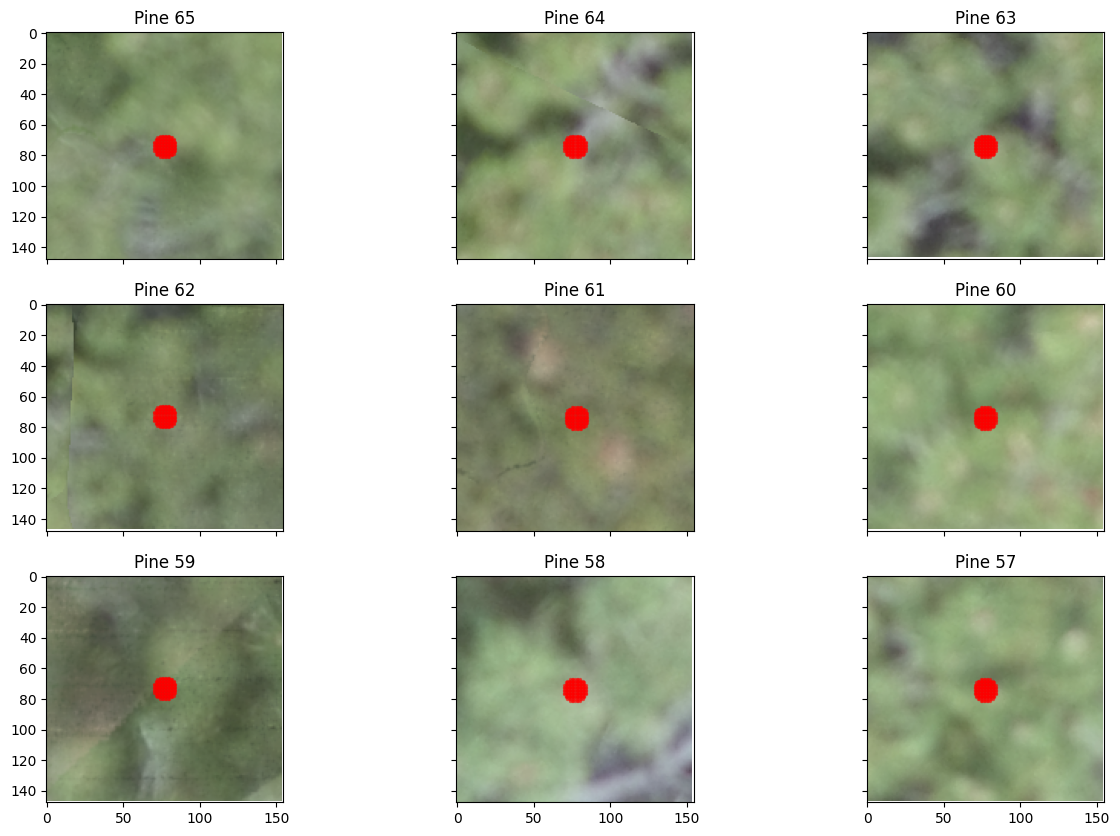

In [55]:
tree_labels = df['class']
plt.figure(figsize=(20, 2))

n = 3

fig, axs = plt.subplots(n,n, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True, sharex=True)

grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

axs = axs.ravel()
axi = 0
offset = 20
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        ax = axs[axi]
        x = df[c.x_col].values[len(df) - offset - axi]
        y = df[c.y_col].values[len(df) - offset - axi]
        bb0 = c.build_polygon_from_centre_point(x, y, 1, 1, "EPSG:32614")
        bb = [o.image.index(x[0], x[1]) for x in bb0]
        permute = 0
        downsample = 1
        values = []
        for image_band in bands:
            # Here we are extracting the feature i.e. the value from the image bands we're interested in
            x0 = min([x[1] for x in bb])
            x1 = max([x[1] for x in bb])
            y0 = min([x[0] for x in bb])
            y1 = max([x[0] for x in bb])
            val = image_band[y0:y1, x0:x1]#[::downsample, ::downsample]
            values.append(np.array(val))
            num_pix_y = int((y1-y0)/downsample)
            num_pix_x = int((x1-x0)/downsample)
        values = np.array(values)
        reshaped = values.reshape(values.shape)
        img = reshaped.swapaxes(0, 1)
        img = img.swapaxes(1, 2)
        ax.imshow(img)
        x = df[c.x_col].values[len(df) - offset - axi]
        y = df[c.y_col].values[len(df) - offset - axi]
        y, x = o.image.index(x, y)
        bb = c.build_circle_from_centre_point(x, y, 8)
        for b in bb:
            ax.scatter(b[0]-x0, b[1]-y0, s=2, c=colour[len(df) - offset - axi], alpha=0.5)
        ax.set_title(f'{tree_labels[len(df) - offset - axi]} {len(df) - offset - axi}')
        axi += 1

plt.savefig('AllData_Pine.svg')


# OOD classifier

len training df 6800
None
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 192)]        0           []                               
                                                                                                  
 dense_30 (Dense)               (None, 16)           3088        ['default_input[0][0]']          
                                                                                                  
 batch_normalization_30 (BatchN  (None, 16)          64          ['dense_30[0][0]']               
 ormalization)       

116/116 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0298
Epoch 45/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0254
Epoch 46/100
116/116 [==============================] - 0s 3ms/step - loss: 0.0099 - val_loss: 0.0265
Epoch 47/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0274
Epoch 48/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0237
Epoch 49/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0097 - val_loss: 0.0258
Epoch 50/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0212
Epoch 51/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.0194
Epoch 52/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0206
Epoch 53/100
116/116 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 

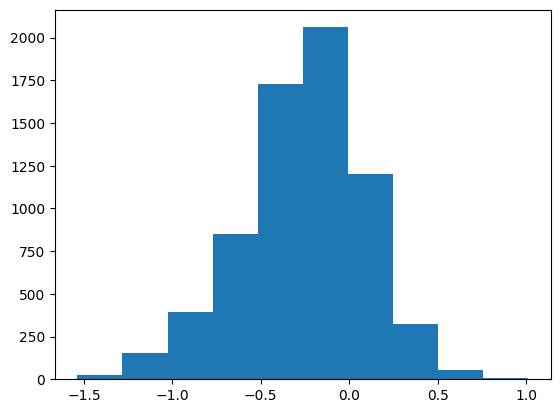

192
--------------------------------------------------------------------------------
                               Encoder summary:	                                
--------------------------------------------------------------------------------
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 default_input (InputLayer)     [(None, 192)]        0           []                               
                                                                                                  
 dense_33 (Dense)               (None, 16)           3088        ['default_input[0][0]']          
                                                                                                  
 batch_normalization_33 (BatchN  (None, 16)          64          ['dense_33[0][0]']               
 ormalization)                             

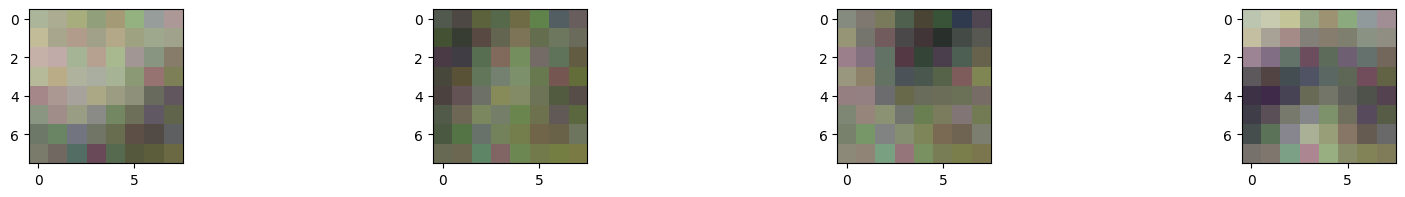

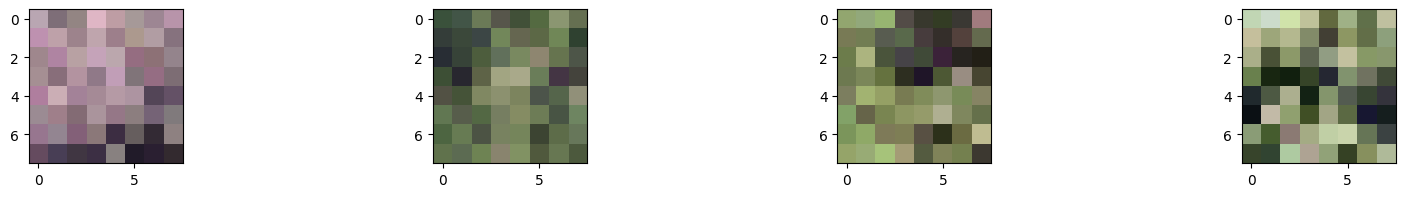

In [73]:
img_bands = [1, 2, 3]
config = {'scale_data': False,
                  'learning'
                          # Whether to min max scale your data VAEs work best when data is pre-normalised & outliers removed for trainiing
                          'batch_norm': True,
                          'loss': {'loss_type': 'mse',  # mean squared error
                                   'distance_metric': 'mmd',  # Maximum mean discrepency (can use kl but it works worse)
                                   'mmd_weight': 0.001},
                          # Weight of mmd vs mse - basically having this > 1 will weigh making it normally distributed higher
                          # and making it < 1 will make reconstruction better.
                          'encoding': {'layers': [{'num_nodes': 16, 'activation_fn': 'relu'}]}, # First layer of encoding
                          'decoding': {'layers': [{'num_nodes': 16, 'activation_fn': 'relu'}]},  # Second layer of decoding
                          'latent': {'num_nodes': 8},  # 64, 32 looked the best so far...
                          'optimiser': {'params': {'learning_rate': 0.001}, 'name': 'adam'}}  # Empty params means use default

ood = OOD(o, c, config=config)
dist = ood.train_ood(image=o, coords=c, bands=[o.get_band(b) for b in img_bands],
                     width_m=1, height_m=1, downsample=20)

# Now let's also plot the reconstruction
plt.hist(dist[:, 0])
plt.show()
ood.load_saved_vae()
vae = ood.vae
# df, labels = ood.build_train_df(image=o, coords=c, bands=[o.get_band(b) for b in img_bands],
#                       width_m=1, height_m=1, downsample=10)
encoding = vae.encode_new_data(ood.train_df[ood.training_cols].values, scale=False)
plt.figure(figsize=(20, 2))
ood.train_df.to_csv('train_2.csv', index=False)
n, xi = 4, 0
for i in [1, 200, 600, 100]:
    d = vae.decoder.predict(np.array([encoding[i]]))[0]
    ax = plt.subplot(1, n, xi + 1)
    reshaped = d.reshape(ood.shape)
    img = reshaped.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    xi += 1
    plt.imshow(img)
plt.show()

encoding = ood.train_df[ood.training_cols].values  # i.e. just do the data
plt.figure(figsize=(20, 2))
xi = 0
for i in [1, 200, 600, 100]:
    d = encoding[i]
    ax = plt.subplot(1, n, xi + 1)
    reshaped = d.reshape(ood.shape)
    img = reshaped.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    plt.imshow(img)
    xi += 1
plt.show()

In [ ]:
from scivae import Optimiser, ConvVAE

kmer_len = 8
config = {'scale_data': False,
          'input_size': [(4, kmer_len), num_mods],
          'output_size': [(4, kmer_len), num_mods],
         'loss': {'loss_type': 'multi', 'distance_metric': 'mmd', 'mmd_weight': 1,
                  'multi_loss': ['ce', 'ce'], 'loss_weightings': [1.0, 2.0]},
          'encoding': {'layers': [{'filters': 32, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'},
                                  {'filters': 64, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'}
                                  ]},
          'decoding': {'layers': [[{'filters': 64, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'}, 
                                   {'num_nodes': 4, 'activation_fn': 'selu'}],
                                  [{'filters': 32, 'kernel_size': 3, 'strides': 2, 'padding':'same',
                                  'activation_fn': 'selu'}, 
                                   {'num_nodes': 8, 'activation_fn': 'selu'}],
                                  [{'filters': 1, 'kernel_size': 3, 'strides': 2, 'padding': 'same',
                                   'activation_fn': None}, {'num_nodes': 2, 'activation_fn': 'selu'},
                                   {'num_nodes': 2, 'activation_fn': 'selu'}
                                   ]
                                  ]},
          'latent': {'num_nodes': 2}, 'optimiser': {'params': {}, 'name': 'adam'}}

train_data = np.array([d.reshape((4, kmer_len, 1)) for d in rmbase_train_df.values if np.nan not in d])

vae = ConvVAE([train_data, train_labels], [train_data, train_labels], train_labels, config, 'vae')
vae.encode('default', epochs=300, batch_size=100, early_stop=True)

In [ ]:
ood = OOD(o, c, config=config)
dist = ood.train_ood(image=o, coords=c, bands=[o.get_band(b) for b in img_bands],
                     width_m=1, height_m=1, downsample=20)

# Now let's also plot the reconstruction
plt.hist(dist[:, 0])
plt.show()
ood.load_saved_vae()
vae = ood.vae
# df, labels = ood.build_train_df(image=o, coords=c, bands=[o.get_band(b) for b in img_bands],
#                       width_m=1, height_m=1, downsample=10)
encoding = vae.encode_new_data(ood.train_df[ood.training_cols].values, scale=False)
plt.figure(figsize=(20, 2))
ood.train_df.to_csv('train_2.csv', index=False)
n, xi = 4, 0
for i in [1, 200, 600, 100]:
    d = vae.decoder.predict(np.array([encoding[i]]))[0]
    ax = plt.subplot(1, n, xi + 1)
    reshaped = d.reshape(ood.shape)
    img = reshaped.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    xi += 1
    plt.imshow(img)
plt.show()

encoding = ood.train_df[ood.training_cols].values  # i.e. just do the data
plt.figure(figsize=(20, 2))
xi = 0
for i in [1, 200, 600, 100]:
    d = encoding[i]
    ax = plt.subplot(1, n, xi + 1)
    reshaped = d.reshape(ood.shape)
    img = reshaped.swapaxes(0, 1)
    img = img.swapaxes(1, 2)
    plt.imshow(img)
    xi += 1
plt.show()

2023-06-26 21:36:29.676941: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [1,2], In[1]: [4,16]
	 [[{{node decoder/dense_28/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'decoder/dense_28/Relu' defined at (most recent call last):
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gq/6ljhmvm1713fykdjqbl188pm0000gn/T/ipykernel_87230/2275697589.py", line 14, in <module>
      d = vae.decoder.predict(np.array([np.array([xi, yi])]))[0] #, 1, 1, 1, 1, 1, 1
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 2382, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function
      return step_function(self, iterator)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step
      outputs = model.predict_step(data)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
      return self(x, training=False)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/layers/core/dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'decoder/dense_28/Relu'
Matrix size-incompatible: In[0]: [1,2], In[1]: [4,16]
	 [[{{node decoder/dense_28/Relu}}]] [Op:__inference_predict_function_156785]

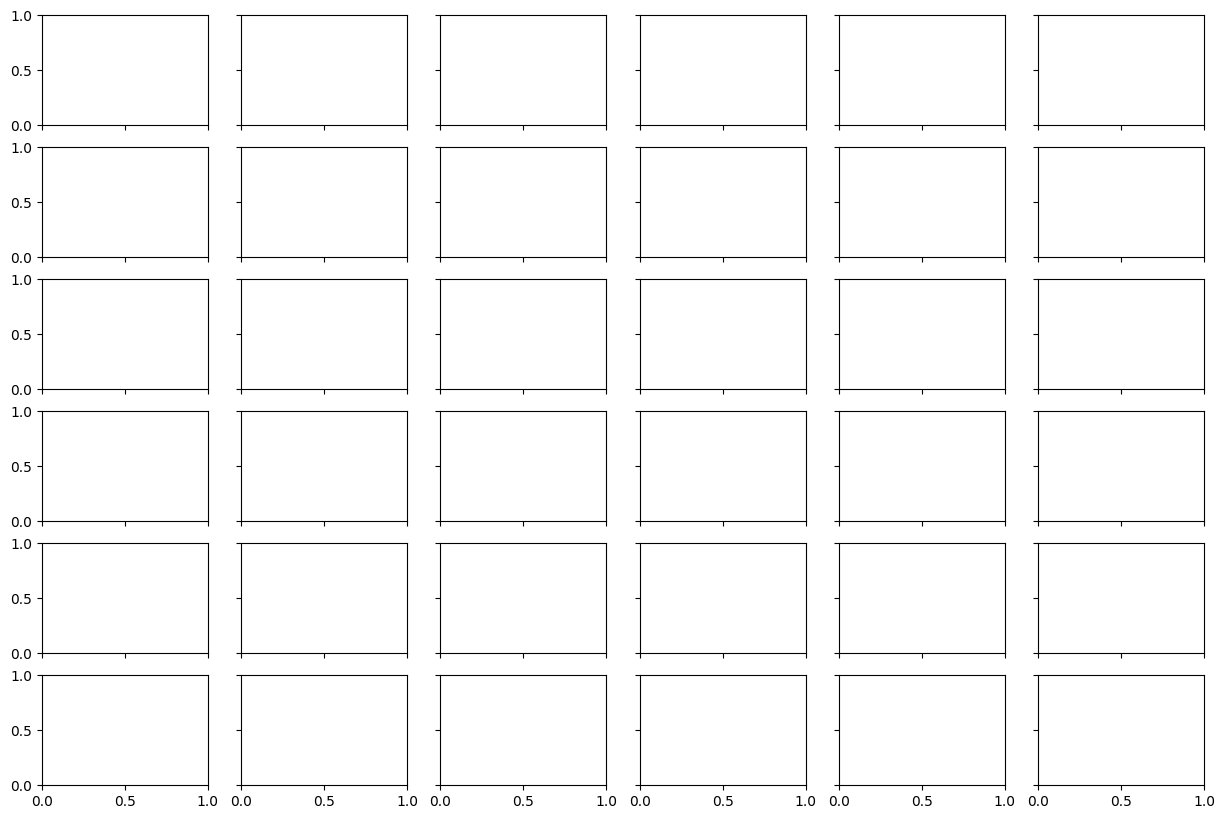

In [72]:
# Then also show what the whole space looks like

n = 6

fig, axs = plt.subplots(n,n, figsize=(15, 10), facecolor='w', edgecolor='k', sharey=True, sharex=True)

grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

axs = axs.ravel()
axi = 0
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        d = vae.decoder.predict(np.array([np.array([xi, yi])]))[0] #, 1, 1, 1, 1, 1, 1
        ax = axs[axi]
        reshaped = d.reshape(ood.shape)
        img = reshaped.swapaxes(0, 1)
        img = img.swapaxes(1, 2)
        ax.imshow(img)
        axi += 1

In [66]:
axs = axs.ravel()
axi = 0
for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        d = vae.decoder.predict(np.array([np.array([1, 1, xi, yi, 1, 1, 1, 1])]))[0]
        ax = axs[axi]
        reshaped = d.reshape(ood.shape)
        img = reshaped.swapaxes(0, 1)
        img = img.swapaxes(1, 2)
        ax.imshow(img)
        axi += 1

1/1 [==============================] - 0s 17ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 14ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 15ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 16ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


## Now also show the mask of the NIR band

Doesn't have a mask!

<!--         mask = o.mask_on_index(sr, 10)
        plt.imshow(mask)
        plt.show()
        # Check how it looks with the masking of the image
        plt.imshow(mask*o.get_band(1))
        plt.show()
 -->

# Classification